Musk v/s Non_musk model.

We will first import the basic libraries -pandas and numpy along with data visualization libraries matplotlib or seaborn. Other libraries will be imported at the point of usage.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score

In [6]:
data = pd.read_csv('F:\IMPPPPPP\IS\Credixo\musk_csv.csv')

To understand the data better, let’s view the dataset details. We need to understand the columns and the type of data associated with each column.

In [3]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [ ]:
We need to check what type of data we have in the dataset.

In [8]:
data.describe(include='all')

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598,6598,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
unique,NaN,102,6598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NON-MUSK-j146,197_1+107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1044,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3299.50000,NaN,NaN,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,NaN,NaN,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,NaN,NaN,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,NaN,NaN,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,NaN,NaN,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,NaN,NaN,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000


In [ ]:
We can see that all required features are numerical and do not have any categorical data. As we don’t have any categorical variables we do not need any data conversion of categorical variables

## Preprocessing

In [9]:
data.isna().sum() #checking missing values

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

TO make our dataset smaller by dropping columns with very high correlation.

In [39]:
# Create correlation matrix
matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper_trian = matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.92
col_to_drop = [column for column in upper_trian.columns if any(upper_trian[column] > 0.92)]


In [40]:
dataset = data.drop(columns = col_to_drop)

In [41]:
dataset.shape 

(6598, 117)

In [ ]:
Now that we understand the data let’s create the input features and the target variables and get the data ready for inputting it to our neural network by preprocessing the data.

In [ ]:
We now split the input features and target variables into training dataset and test dataset. out test dataset will be 20% of our entire dataset.

In [42]:
Train,Test = train_test_split(dataset, random_state=0, test_size = 0.2)
X_train = Train.iloc[:,3:-1]
y_train = Train.iloc[:,-1:]
X_test = Test.iloc[:,3:-1]
y_test = Test.iloc[:,-1:]

Model Creation

We have preprocessed the data and we are now ready to build the neural network.

We are using keras to build our neural network. We import the keras library to create the neural network layers.

There are two main types of models available in keras — Sequential and Model. we will use Sequential model to build our neural network.

We use Dense library to build input, hidden and output layers of a neural network.

In [43]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
Adding a column of 1's to the train and test set.

In [44]:
X_train['ones'] = np.ones(X_train.shape[0])

X_test['ones'] = np.ones(X_test.shape[0])

In [45]:
X_train=X_train.values.reshape(X_train.shape[0],19,6,1)
X_test=X_test.values.reshape(X_test.shape[0],19,6,1)

In [46]:
X_train.shape

(5278, 19, 6, 1)

In [47]:
X_test.shape

(1320, 19, 6, 1)

In [ ]:
ReLu will be the activation function for hidden layers. As this is a binary classification problem we will use sigmoid as the activation function.
Dense layer implements

output = activation(dot(input, kernel) + bias)

kernel is the weight matrix. kernel initialization defines the way to set the initial random weights of Keras layers.
Keras provides multiple initializers for both kernel or weights as well as for bias units.

In [49]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(19,6,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.45))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
Once the different layers are created we now compile the neural network.
As this is a binary classification problem, we use binary_crossentropy to calculate the loss function between the actual output and the predicted output.
To optimize our neural network we use Adadelta(). Adam stands for Adaptive moment estimation. Adam is a combination of RMSProp + Momentum.
Momentum takes the past gradients into account in order to smooth out the gradient descent.
we use accuracy as the metrics to measure the performance of the model.

In [50]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
we now fit out training data to the model we created. we use a batch_size of 64. This implies that we use 64 samples per gradient update.

We iterate over 64 epochs to train the model. An epoch is an iteration over the entire data set.

In [52]:
history = model.fit(X_train,y_train,batch_size=64,epochs=64,validation_data=(X_test,y_test))
score=model.evaluate(X_test,y_test,verbose=0)
print(score)

Train on 5278 samples, validate on 1320 samples
Epoch 1/64
5278/5278 [==============================] - 5s 1ms/step - loss: 1.5645 - accuracy: 0.8109 - val_loss: 0.3072 - val_accuracy: 0.8848
Epoch 2/64
5278/5278 [==============================] - 2s 334us/step - loss: 0.3267 - accuracy: 0.8732 - val_loss: 0.2021 - val_accuracy: 0.9235
Epoch 3/64
5278/5278 [==============================] - 2s 335us/step - loss: 0.2616 - accuracy: 0.8960 - val_loss: 0.1875 - val_accuracy: 0.9273
Epoch 4/64
5278/5278 [==============================] - 2s 335us/step - loss: 0.2177 - accuracy: 0.9153 - val_loss: 0.1660 - val_accuracy: 0.9364
Epoch 5/64
5278/5278 [==============================] - 2s 378us/step - loss: 0.1970 - accuracy: 0.9191 - val_loss: 0.1467 - val_accuracy: 0.9424
Epoch 6/64
5278/5278 [==============================] - 2s 338us/step - loss: 0.1678 - accuracy: 0.9314 - val_loss: 0.1731 - val_accuracy: 0.9144
Epoch 7/64
5278/5278 [==============================] - 2s 366us/step - loss: 

5278/5278 [==============================] - 2s 364us/step - loss: 0.0226 - accuracy: 0.9920 - val_loss: 0.0308 - val_accuracy: 0.9894
Epoch 57/64
5278/5278 [==============================] - 2s 357us/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0749 - val_accuracy: 0.9780
Epoch 58/64
5278/5278 [==============================] - 2s 353us/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0408 - val_accuracy: 0.9848
Epoch 59/64
5278/5278 [==============================] - 2s 346us/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0414 - val_accuracy: 0.9871
Epoch 60/64
5278/5278 [==============================] - 2s 388us/step - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0403 - val_accuracy: 0.9886
Epoch 61/64
5278/5278 [==============================] - 2s 352us/step - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0390 - val_accuracy: 0.9864
Epoch 62/64
5278/5278 [==============================] - 2s 347us/step - loss: 0.0129 - accuracy: 0.9951 - val_loss: 0.0586 - val_

##  Performance Measures

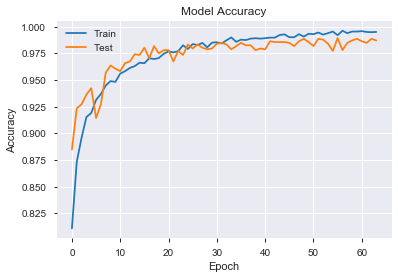

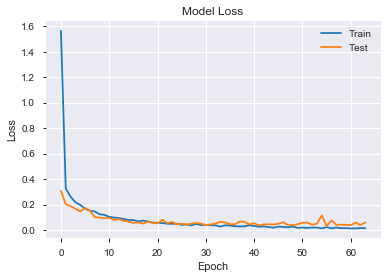

In [54]:
%matplotlib inline

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [57]:
print("F1 score:",f1_score(y_test,model.predict_classes(X_test),))
print("Recall:",recall_score(y_test,model.predict_classes(X_test),))
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])

F1 score: 0.9560723514211886
Recall: 0.925
Validation Loss: 0.05963287820186406
Validation Accuracy: 0.9871212244033813


In [58]:
model.save('F:\IMPPPPPP\IS\Credixo\musk.h5')